In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from scipy import stats
import time

# set seaborn settings
sns.set()
plt.rcParams["patch.force_edgecolor"] = True # set lines

import warnings
warnings.filterwarnings('ignore')

In [44]:
root = "data\\2016\\"

winter = ["01", "02", "11", "12"]
spring = ["03", "04", "05"]
summer = ["06", "07", "08"]
fall = ["09", "10"]

In [45]:
def interestedColumns(df):
    interestedCols = ["taxi_id", "tolls", "trip_start_timestamp", "trip_end_timestamp", "company", "dropoff_centroid_longitude", \
        "dropoff_centroid_latitude", "fare", "payment_type", "pickup_centroid_latitude", "pickup_centroid_longitude", \
        "dropoff_community_area", "pickup_community_area", "tips", "trip_miles", "trip_seconds", "trip_total"]
    
    result = df[interestedCols]
    return(result)

In [54]:
def combineMonths(months):
    df = pd.DataFrame()
    
    for month in months:
        print("Working on", month)
        monthDir = join(root, month)
        filesList = [f for f in listdir(monthDir) if isfile(join(monthDir, f))]
        print("-- Found", len(filesList), "files")
        
        for file in filesList:
            print("----- Working on", file)
            filePath = join(monthDir, file)
            fileDf = pd.read_csv(filePath)
            fileDf = interestedColumns(fileDf)
            df = pd.concat([df, fileDf])  
            
        print("")
            
    print("***** Row Count:", len(df), "*****") 
    print("=============================================")            
    return(df)

In [55]:
winterDf = combineMonths(winter)
springDf = combineMonths(spring)
summerDf = combineMonths(summer)
fallDf = combineMonths(fall)

Working on 01
-- Found 9 files
----- Working on ChiTaxi_2016-01-01_2016-02-01_00000000000000000000.csv
----- Working on ChiTaxi_2016-01-01_2016-02-01_00000000000000200000.csv
----- Working on ChiTaxi_2016-01-01_2016-02-01_00000000000000400000.csv
----- Working on ChiTaxi_2016-01-01_2016-02-01_00000000000000600000.csv
----- Working on ChiTaxi_2016-01-01_2016-02-01_00000000000000800000.csv
----- Working on ChiTaxi_2016-01-01_2016-02-01_00000000000001000000.csv
----- Working on ChiTaxi_2016-01-01_2016-02-01_00000000000001200000.csv
----- Working on ChiTaxi_2016-01-01_2016-02-01_00000000000001400000.csv
----- Working on ChiTaxi_2016-01-01_2016-02-01_00000000000001600000.csv

Working on 02
-- Found 9 files
----- Working on ChiTaxi_2016-02-01_2016-03-01_00000000000000000000.csv
----- Working on ChiTaxi_2016-02-01_2016-03-01_00000000000000200000.csv
----- Working on ChiTaxi_2016-02-01_2016-03-01_00000000000000400000.csv
----- Working on ChiTaxi_2016-02-01_2016-03-01_00000000000000600000.csv
-

In [129]:
def convertDataType(df):
    df["taxi_id"] = df["taxi_id"].astype("category")
    df["tolls"] = df["tolls"].astype("float").fillna(0.0)
    df["trip_start_timestamp"] = pd.to_datetime(df["trip_start_timestamp"], errors = "coerce").dt.strftime("%m/%d/%Y %I:%M %p")
    df["trip_end_timestamp"] = pd.to_datetime(df["trip_end_timestamp"], errors = "coerce").dt.strftime("%m/%d/%Y %I:%M %p")
    df["company"] = df["company"].astype("category")
    df["dropoff_centroid_longitude"] = df["dropoff_centroid_longitude"].astype("category")
    df["dropoff_centroid_latitude"] = df["dropoff_centroid_latitude"].astype("category")
    df["pickup_centroid_latitude"] = df["pickup_centroid_latitude"].astype("category")
    df["pickup_centroid_longitude"] = df["pickup_centroid_longitude"].astype("category")
    df["fare"] = df["fare"].astype("float").fillna(0.0)
    df["payment_type"] = df["payment_type"].astype("category")
    df["dropoff_community_area"] = df["dropoff_community_area"].astype("category")
    df["pickup_community_area"] = df["pickup_community_area"].astype("category")
    df["tips"] = df["tips"].astype("float").fillna(0.0)
    df["trip_miles"] = df["trip_miles"].astype("float").fillna(0.0)
    df["trip_seconds"] = df["trip_seconds"].astype("float").fillna(0.0)
    df["trip_total"] = df["trip_total"].astype("float").fillna(0.0) 
        
    return(df)

In [131]:
winterDf.dtypes

taxi_id                        object
tolls                         float64
trip_start_timestamp           object
trip_end_timestamp             object
company                        object
dropoff_centroid_longitude    float64
dropoff_centroid_latitude     float64
fare                          float64
payment_type                   object
pickup_centroid_latitude      float64
pickup_centroid_longitude     float64
dropoff_community_area        float64
pickup_community_area         float64
tips                          float64
trip_miles                    float64
trip_seconds                  float64
trip_total                    float64
dtype: object

In [ ]:
convertedWinter = convertDataType(winterDf)
convertedWinter.dtypes

In [190]:
def removeOutliers(seriesData):   
    seriesData = seriesData.astype(float).fillna(0.0)
    print("Started with ", len(seriesData), "values")
    Q75, Q25 = np.percentile(seriesData, [75, 25])
    IQR = Q75 - Q25
    min = Q25 - (IQR * 1.5)
    max = Q75 + (IQR * 1.5)
    seriesData = np.array(seriesData)
    result = seriesData[np.where((seriesData >= min) & (seriesData <= max))]
    print("Ended with ", len(result), "values")
    print("------------")
    print(stats.describe(result))
    return(result)

In [191]:
tripMiles = removeOutliers(trips["trip_miles"])

Started with  1935686 values
Ended with  1690357 values
DescribeResult(nobs=1690357, minmax=(0.0, 6.9900000000000002), mean=1.2677650934092621, variance=2.1703477310650712, skewness=1.5368862883614511, kurtosis=2.1131472244087366)


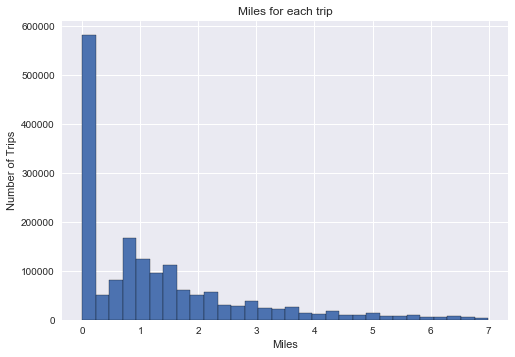

In [192]:
# trips_miles

_ = plt.hist(tripMiles, bins = 30)
_ = plt.xlabel("Miles")
_ = plt.ylabel("Number of Trips")
_ = plt.title("Miles for each trip")
plt.show()

In [193]:
tripTotal = removeOutliers(trips["trip_total"])

Started with  1935686 values
Ended with  1647879 values
DescribeResult(nobs=1647879, minmax=(0.0, 32.100000000000001), mean=11.01538356881786, variance=28.958896657841613, skewness=1.3129783734404175, kurtosis=1.8007932322567486)


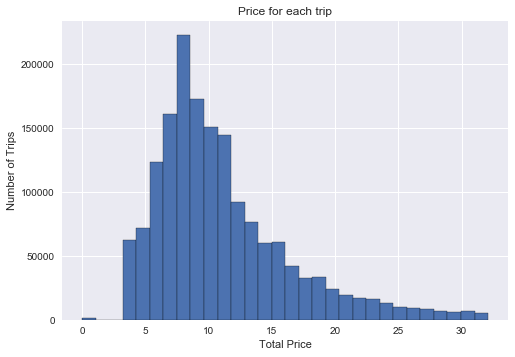

In [194]:
# trip total $
_ = plt.hist(tripTotal, bins = 30)
_ = plt.xlabel("Total Price")
_ = plt.ylabel("Number of Trips")
_ = plt.title("Price for each trip")
plt.show()

In [195]:
tripDuration = removeOutliers(trips["trip_seconds"])

Started with  1935686 values
Ended with  1769547 values
DescribeResult(nobs=1769547, minmax=(0.0, 1950.0), mean=599.28849530416539, variance=195660.8936933068, skewness=0.8111628988715021, kurtosis=0.2804914789280253)


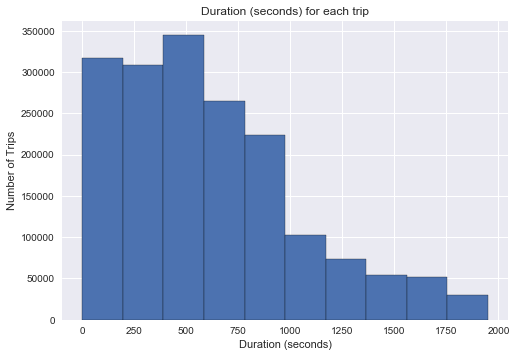

In [196]:
# trip duration (seconds)
_ = plt.hist(tripDuration)
_ = plt.xlabel("Duration (seconds)")
_ = plt.ylabel("Number of Trips")
_ = plt.title("Duration (seconds) for each trip")
plt.show()

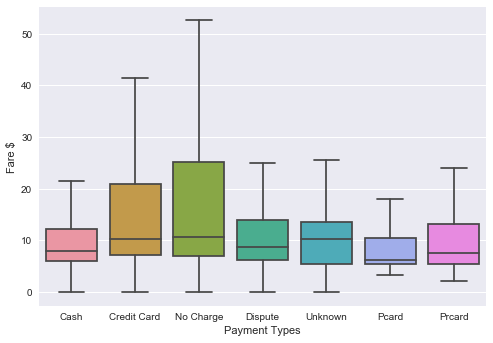

In [198]:
_ = sns.boxplot(x = "payment_type", y = "fare", data = trips, showfliers = False)
_ = plt.xlabel("Payment Types")
_ = plt.ylabel("Fare $")
plt.show()